<a href="https://colab.research.google.com/github/NattachaiJairak/DADS6003/blob/main/Week02-LR/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 Normal equation (Numpy version)

<class 'numpy.ndarray'>
theta =  [0.571 0.857]
x_test =  range(0, 11)
y predict =  [0.571 1.429 2.286 3.143 4.    4.857 5.714 6.571 7.429 8.286 9.143]


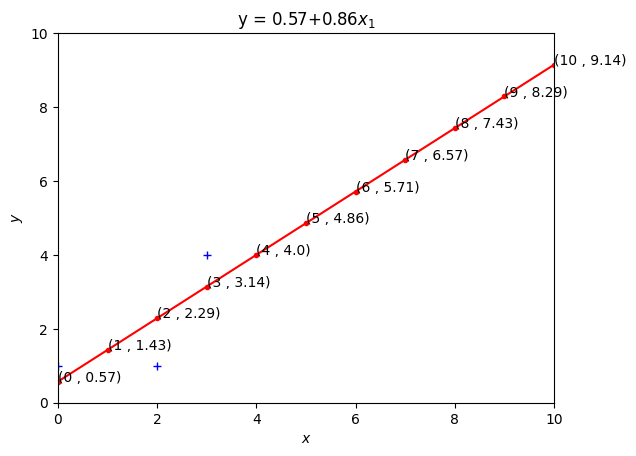

In [10]:
import numpy as np
np.set_printoptions(precision=3)

x = np.array([0,2,3])
y = np.array([1,1,4])
x_b = np.c_[np.ones((len(x),1)),x]

#call inverse function from linear algebra module
theta = np.linalg.pinv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(type(theta))
print("theta = ", theta)

#prediction
x_t = range(0,11)
x_t_b = np.c_[np.ones((len(x_t),1)), x_t]
y_p = x_t_b.dot(theta)
print("x_test = ",x_t)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.title("y = "+str(np.round(theta[0],2))+"+"+str(np.round(theta[1],2))+r"$x_1$")
plt.plot(x_t, y_p,"r.-")
plt.plot(x, y, "b+")
for x,y in zip(x_t, y_p):
  plt.text( x ,y, f"({np.round(x,2)} , {np.round(y,2)})")
plt.axis([0,10,0,10])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()


## 1.2 Normal equation (Sklearn version)

In [11]:
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
x = np.array([[0,2,3]]).T
y = np.array([1,1,4])

lin_reg = LinearRegression()
lin_reg.fit(x, y)
display(Latex(f'$y = {np.round(lin_reg.intercept_,2)}+{np.round(lin_reg.coef_[0],2)}x_{1}$'))
x_n = np.array([[1,5]]).T
ans = lin_reg.predict(x_n)
print("Predicted results = ")
print(ans)

<IPython.core.display.Latex object>

Predicted results = 
[1.429 4.857]


#2. Gradient descent


In [12]:
import random

In [13]:
#Relation between key=theta, value=J
lossTheta0 = {}
lossTheta1 = {}

In [14]:
def cost_function(theta0, theta1, x, y, N):
    c = 1/(2*N) * sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(N)])
    return c

In [15]:
def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):
  converged = False
  iter = 0
  N = x.shape[0] # number of samples

  # initial theta
  t0 = np.random.random(x.shape[1])
  print("Initial theta0 ",t0)

  t1 = np.random.random(x.shape[1])
  print("Initial theta1",t1)

  # total error, J(theta)
  J = cost_function(t0,t1,x,y,N)
  print("First J = ",J)

  lossTheta0[t0[0]] = J[0]
  lossTheta1[t1[0]] = J[0]

  # Iterate Loop
  while not converged:
    grad0 = sum([(t0 + t1*x[i] - y[i])*1 for i in range(N)])
    grad1 = sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(N)])

    # update the theta_temp
    t0 = t0 - alpha * (1/N) * grad0
    t1 = t1 - alpha * (1/N) * grad1

    #print("\niter = ",iter)
    #print("t0 = ",t0)
    #print("t1 = ",t1)
    # error
    e = cost_function(t0,t1,x,y,N)
    #print("error = ",e)

    #Terminate 1
    if abs(J-e) <= ep:
        print("Converged at ", iter, "/", max_iter)
        converged = True

    J = e   # update error s
    iter += 1  # update iter

    if iter % 1 == 0:
      lossTheta0[t0[0]] = J[0]
      lossTheta1[t1[0]] = J[0]

    #Termiate 2
    if iter == max_iter:
        print('Max interactions exceeded!')
        converged = True

  return np.array([t0,t1]).reshape(-1)


x.shape = (3, 1) y.shape = (3,)
Initial theta0  [0.27]
Initial theta1 [0.397]
First J =  [1.165]
Max interactions exceeded!
<class 'numpy.ndarray'>
[0.567 0.859]


<ipython-input-16-f00e9816204d>:23: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.



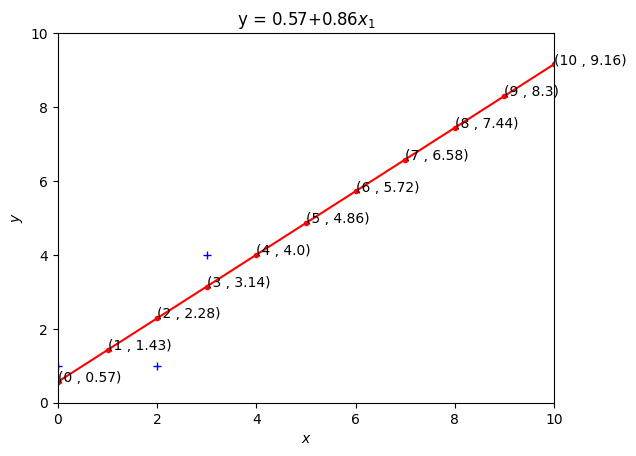

In [16]:
if __name__ == '__main__':

  x = np.array([[0,2,3]]).T # or x = np.array([[0],[2],[3]])
  y = np.array([1,1,4])
  print("x.shape = %s y.shape = %s" %(x.shape, y.shape))
  alpha = 0.01 # learning rate

  theta = gradient_descent(alpha, x, y,ep=0.0000000001, max_iter=1000)
  print(type(theta))
  print (theta)


  #prediction
  x_t = range(0,11)
  x_t_b = np.c_[np.ones((len(x_t),1)), x_t]
  y_p = x_t_b.dot(theta)
  #print("x_test = ",x_t)
  #print("y predict = ",y_p)

  # plot
  plt.title("y = "+str(np.round(theta[0],2))+"+"+str(np.round(theta[1],2))+r"$x_1$")
  plt.plot(x_t, y_p,"r.-")
  plt.plot(x, y, "b.",marker="+")
  for x,y in zip(x_t, y_p):
    plt.text( x ,y, f"({np.round(x,2)} , {np.round(y,2)})")
  plt.axis([0,10,0,10])
  plt.xlabel(r'$x$')
  plt.ylabel(r'$y$')
  plt.show()

#Gradient Descent curve Static VS Dynamic

1001


Text(0, 0.5, '$Cost value (J)$')

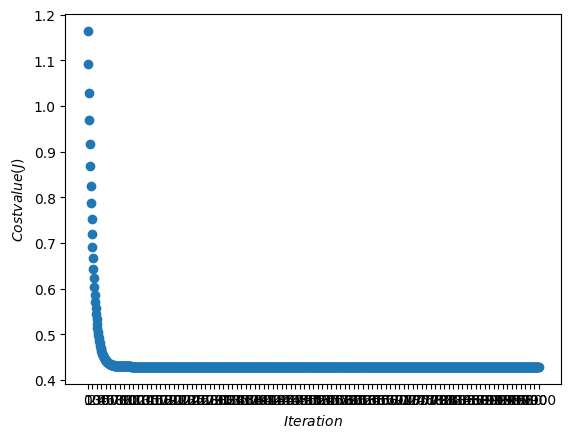

In [17]:
lists = sorted(lossTheta0.items()) # sorted by key, return a list of tuples
numPoints = len(lists)
print(numPoints)
_x, _y = zip(*lists) # unpack a list of pairs into two tuples
plt.scatter(range(numPoints),_y)
plt.xticks(range(0,numPoints,10))
plt.xlabel(r'$Iteration$')
plt.ylabel(r'$Cost value (J)$')

In [18]:
import plotly.graph_objects as go
import numpy as np

_x = list(_x)
_y = list(_y)
xm = np.min(_x) - 0.2
xM = np.max(_x) + 0.2
ym = np.min(_y) - 0.2
yM = np.max(_y) + 0.2
N = len(_x)

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],

    layout=go.Layout(

        xaxis=dict(range=[xm, xM]),
        yaxis=dict(range=[ym, yM]),

        title_text="Gradient Descent",
        hovermode="closest",
        xaxis_title=r"$\theta_0$",
        yaxis_title="Cost function (J)",

        updatemenus=[
            dict(type="buttons",
                          buttons=[dict(label="Click to play",
                                        method="animate",
                                        args=[None])]
                 )
            ]
        ),

    frames=[go.Frame(
        data=[go.Scatter(
            x=[_x[k]],
            y=[_y[k]],
            mode="markers",
            marker=dict(color="red", size=10))])
        for k in range(0,N,5)],
)

fig.show()